In [76]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from datetime import date, datetime
import re 
import seaborn as sns
import investpy as inv
import plotly.graph_objects as go

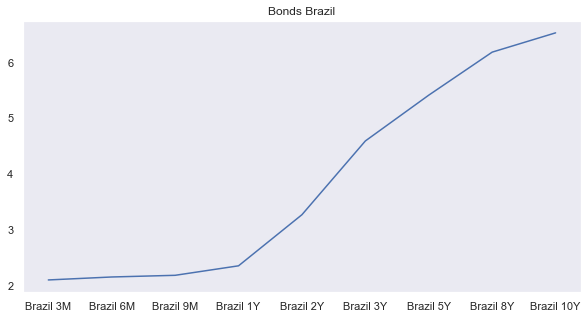

In [77]:
sns.set()
bondsBR = inv.get_bonds_list('brazil')
bonds_completo = inv.get_bonds_overview('brazil')
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(bondsBR,bonds_completo['last_close']);
plt.title('Bonds Brazil')
plt.grid(False)

In [78]:
juros_brazil = pd.DataFrame()
for i in bondsBR:
    juros_brazil[i] = inv.get_bond_historical_data(i,from_date='01/01/2012',to_date='04/07/2020')['Close']

juros_brazil.index = pd.to_datetime(juros_brazil.index)

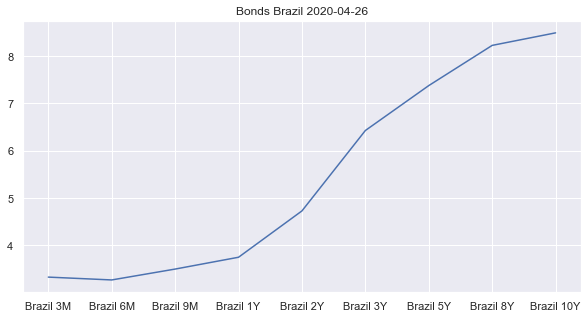

In [79]:
plt.plot(juros_brazil.loc['2020-04-26'].index,juros_brazil.loc['2020-04-26'].values)
plt.title('Bonds Brazil 2020-04-26')
plt.show()

In [80]:
juros_brazil = pd.DataFrame()
for i in bondsBR:
    juros_brazil[i] = inv.get_bond_historical_data(i,from_date='01/01/2012',to_date='04/07/2020',interval='Monthly')['Close']

juros_brazil.index = pd.to_datetime(juros_brazil.index)

fig = go.Figure()
for x in juros_brazil[juros_brazil.index.year >= 2020].index:
    fig.add_trace(go.Scatter(x=bondsBR,y=juros_brazil.loc[x],mode='lines', name=str(x)))

fig.show()

In [86]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df


selic = consulta_bc(4390)
selic

,valor
data,
1986-06-01,1.27
1986-07-01,1.95
1986-08-01,2.57
1986-09-01,2.94
1986-10-01,1.96
...,...
2020-03-01,0.34
2020-04-01,0.28
2020-05-01,0.24
